In [13]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Sample Mall Customers dataset (subset for demo; load full CSV in practice)
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Gender': ['Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
    'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 31],
    'Annual_Income': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19],
    'Spending_Score': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]
}

df = pd.DataFrame(data)
le = LabelEncoder()

# Feature encoding for Gender
df['Gender'] = le.fit_transform(df['Gender'])
# df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})




df['High Value'] = ((df ['Annual_Income'] > 17) & (df['Spending_Score'] > 70)).astype(int)
print(df)

X = df[['Gender','Age','Annual_Income','Spending_Score']]
y = df['High Value']

# data split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# keep 2 best features out of 4
model = LogisticRegression(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=2)
rfe.fit(X_train, y_train)

# Results
print("Selected Features:", X.columns[rfe.support_])
print("Feature Ranking:", rfe.ranking_)
print("Selected:", rfe.support_)



   CustomerID  Gender  Age  Annual_Income  Spending_Score  High Value
0           1       1   19             15              39           0
1           2       0   21             15              81           0
2           3       0   20             16               6           0
3           4       0   23             16              77           0
4           5       1   31             17              40           0
5           6       0   22             17              76           0
6           7       0   35             18               6           0
7           8       1   23             18              94           1
8           9       1   64             19               3           0
9          10       0   31             19              72           1
Selected Features: Index(['Age', 'Spending_Score'], dtype='object')
Feature Ranking: [3 1 2 1]
Selected: [False  True False  True]


=== PCA Results ===
PC1 explains: 51.96%
PC2 explains: 22.21%
Total explained: 74.17%

Loadings (feature contributions):
                     PC1       PC2
Gender          0.330524  0.928271
Age             0.652948 -0.105627
Annual_Income   0.525287 -0.315591
Spending_Score -0.434150  0.166005


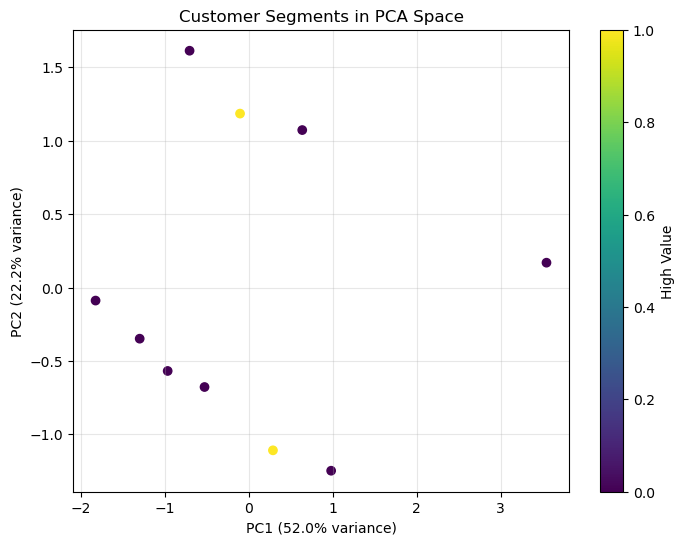

In [15]:
# principal component analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Your customer data (no target needed)
X = df[['Gender', 'Age', 'Annual_Income', 'Spending_Score']]

# 1. Standardize (CRITICAL for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA: Reduce to 2 components
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

# Results
print("=== PCA Results ===")
print(f"PC1 explains: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2 explains: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total explained: {sum(pca.explained_variance_ratio_):.2%}")
print("\nLoadings (feature contributions):")
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], 
                       index=X.columns)
print(loadings)

# 3. Visualize
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['High Value'], cmap='viridis')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Customer Segments in PCA Space')
plt.colorbar(scatter, label='High Value')
plt.grid(True, alpha=0.3)
plt.show()